In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#!pip install fastai --upgrade
from fastai.vision.all import *

# Getting the data

In [3]:
path = Path('../../../../data/distracted_drivers/')
path

Path('../../../../data/distracted_drivers')

In [4]:
Path.BASE_PATH = path

In [5]:
path.ls()

(#3) [Path('driver_imgs_list.csv'),Path('imgs'),Path('sample_submission.csv')]

In [6]:
df = pd.read_csv(path/'driver_imgs_list.csv')
df.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [7]:
def add_valid(df, n_valid=4):
  # validation subjects
  valid_subjects = df.sample(frac=1).subject.unique()[-n_valid:]
  # Identifying the validation subjects
  df['is_valid'] = df['subject'].isin(valid_subjects)

  print('Valid Subjects', valid_subjects)
  print((df['is_valid'] == True).sum())

  # adding the path to the df
  df['img_path'] = df['classname'] + '/' + df['img']
  return df

In [8]:
n_df = add_valid(df, n_valid=3)
n_df.sample(5)

Valid Subjects ['p021' 'p052' 'p042']
2568


,subject,classname,img,is_valid,img_path
21392,p075,c7,img_63378.jpg,False,c7/img_63378.jpg
3378,p016,c0,img_45276.jpg,False,c0/img_45276.jpg
3291,p015,c9,img_77234.jpg,False,c9/img_77234.jpg
6319,p022,c5,img_100706.jpg,False,c5/img_100706.jpg
18376,p061,c7,img_44669.jpg,False,c7/img_44669.jpg


(480, 640)


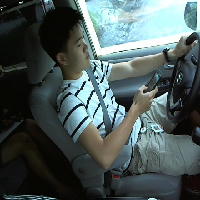

In [9]:
# examine images
img = PILImage.create(path/'imgs/train'/n_df.img_path[111])
print(img.shape)
img.reshape(200, 200)

In [10]:
# transforms
item_tfms = Resize(224)
batch_tfms = aug_transforms(size=224, do_flip=False)

In [11]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
               get_x=ColReader('img_path', pref=path/'imgs/train/'),
               splitter=ColSplitter(),
               get_y=ColReader('classname'),
               batch_tfms=Resize(224))

In [12]:
dls = db.dataloaders(df, bs=32)

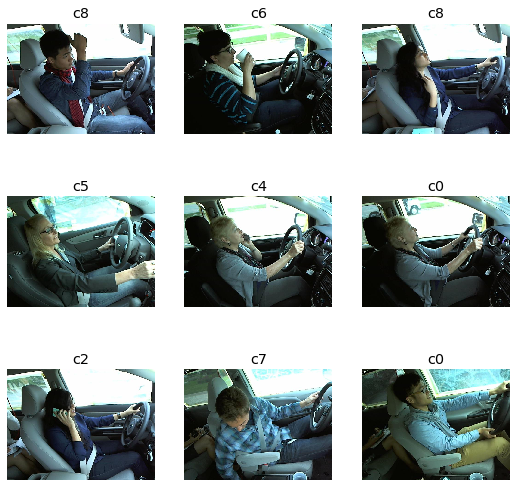

In [13]:
dls.show_batch()

In [14]:
len(dls.train_ds), len(dls.valid_ds)

(19856, 2568)

In [15]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [16]:
learn.lr_find()

RuntimeError: CUDA out of memory. Tried to allocate 76.00 MiB (GPU 0; 5.94 GiB total capacity; 4.70 GiB already allocated; 21.00 MiB free; 4.87 GiB reserved in total by PyTorch)

In [ ]:
learn.fine_tune(epochs=20, lr_base=1e-3, freeze_epochs=6)

epoch,train_loss,valid_loss,accuracy,time
0,0.850369,1.212302,0.608347,12:41
1,0.261312,0.971195,0.707865,12:37
2,0.160605,0.957924,0.725522,12:36
3,0.108364,1.005013,0.733226,12:36
4,0.095637,0.773151,0.790369,12:37
5,0.055493,0.767558,0.834029,12:37


epoch,train_loss,valid_loss,accuracy,time
0,0.058937,0.540657,0.878973,18:02
1,0.041844,0.507264,0.906902,17:59
2,0.032654,0.532373,0.868700,17:59
3,0.055051,0.531743,0.875120,17:59
4,0.035000,0.409777,0.908507,18:00
5,0.051046,0.233731,0.951204,18:00
6,0.017478,0.268825,0.926164,17:59
7,0.031585,0.536556,0.889888,18:01
8,0.006826,0.434540,0.923595,18:01


In [ ]:
learn.save('/gdrive/My\ Drive/no_aug')